---
### Задачи
1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиальные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

Описание данных
**user_data:**
    client – идентификатор пользователя
    premium – является ли клиент премиальным
    age – возраст

**logs:**
    client – идентификатор пользователя
    success – результат (успех – 1, нет – 0)
    platform – платформа
    time – время в формате Unix

---
### №1
Импортируйте библиотеку pandas как pd.
Загрузите два датасета user_data и logs.
Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику.
**Вопрос:** Сколько уникальных значений принимает переменная platform?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# загружаем в датафрейм таблицы
user_data = pd.read_csv('data_set/user_data.csv', sep=',')
logs = pd.read_csv('data_set/logs.csv', sep=',')

In [4]:
# проверяем размер таблицы, типы переменных
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [5]:
# смотрим краткую описательную статистику
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [6]:
# проверяем размер таблицы, типы переменных
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [7]:
# смотрим краткую описательную статистику
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [10]:
# отвечаем на вопрос "Сколько уникальных значений принимает переменная - platform?"
logs.platform.nunique()

3

---
### №2
Какой клиент совершил больше всего успешных операций?
Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.
Например: 12, 123, 456

In [32]:
# сделаем соответствующий запрос с выбрав success только по True, сгрупировав по клиентам посчитав количество count, отсортируем чтобы видно максимальных было наверху и сохраним выборку в переменную
client_max = logs\
    .query('success == True')\
    .groupby('client', as_index = False)\
    .agg({'success': 'count'})\
    .sort_values('success', ascending=False)
client_max

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [43]:
#теперь выберем всех максимальных клиентов в виде списка а не таблицы
client_max\
    .query('success == 41')\
    .sort_values('client')\
    .client\
    .tolist()


[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

---
### №3
С какой платформы было совершено наибольшее количество успешных операций?

In [44]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

---
### №4
Какая платформа наиболее популярна среди премиумных клиентов?

In [53]:
# объединим две таблицы по полю client и запишем в одну переменную
logs_data = logs.merge(user_data, on='client')
logs_data.head(5)

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [69]:
# сделаем запрос по отбору Premium клиентов и группировке по платформе и подсчету количества по платформе
logs_data\
    .query('premium == True')\
    .platform\
    .value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

---
### №5
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию.
Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге.

In [61]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

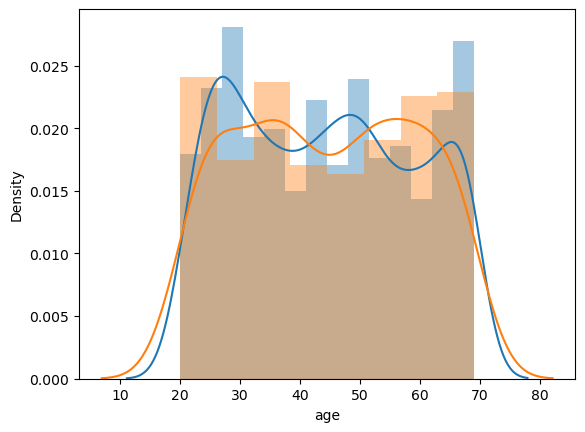

In [74]:
sns.distplot(logs_data.query('premium == False').age)
sns.distplot(logs_data.query('premium == True').age)

---
### №6
Постройте график распределения числа успешных операций:

    x – число успешных операций
    y – число клиентов, совершивших такое количество успешных операций

Выберите подходящие утверждения:
[] Бóльшая часть наблюдений сосредоточена в правой части графика
[] Бóльшая часть наблюдений сосредоточена в левой части графика
[] Несколько клиентов совершили более 40 успешных действий
[] Все клиенты совершили не более 5 успешных операций

<AxesSubplot:ylabel='Count'>

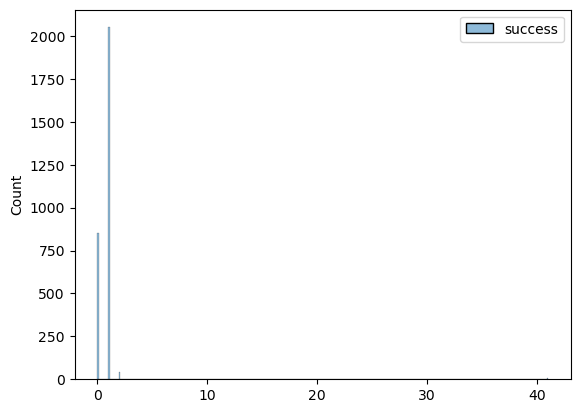

In [126]:
# построим графи распределения:
# видим что большая часть сосредоточена в левой части
sns.histplot(logs_data.groupby('client').agg({'success': 'sum'}))

In [121]:
# теперь проверим гипотезу что несколько клиентов совершили более 40 операций
# сохраним в таблицу групировав по полю клиент и посчитав на каждого клиента кол-во операций
temp = logs_data.groupby('client').agg({'success':'sum'})

In [123]:
# посчитаем сколько операций какое количество клиентов соверщшило
# и видим что более 41 операции сивершило 9 клиентов
temp.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

---
### №7
⭐️Задание со звёздочкой!⭐️
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot.
По оси x – возраст, по оси y – число успешных операций.
Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.
Полезные ссылки:

    sns.countplot – документация к типу графика
    figsize – про размер графиков

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

<AxesSubplot:xlabel='age', ylabel='count'>

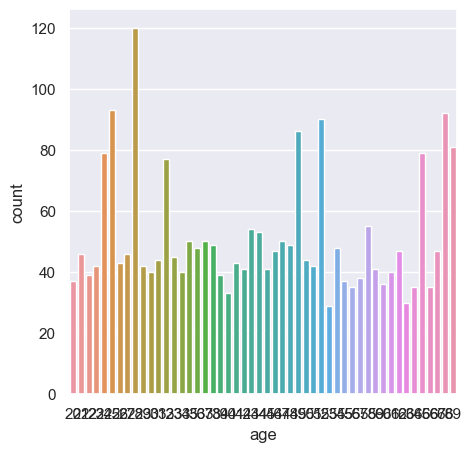

In [141]:
# сделаем соответствующее построение графика
sns.countplot(data=logs_data.query('success == True'), x='age')

<AxesSubplot:xlabel='age', ylabel='count'>

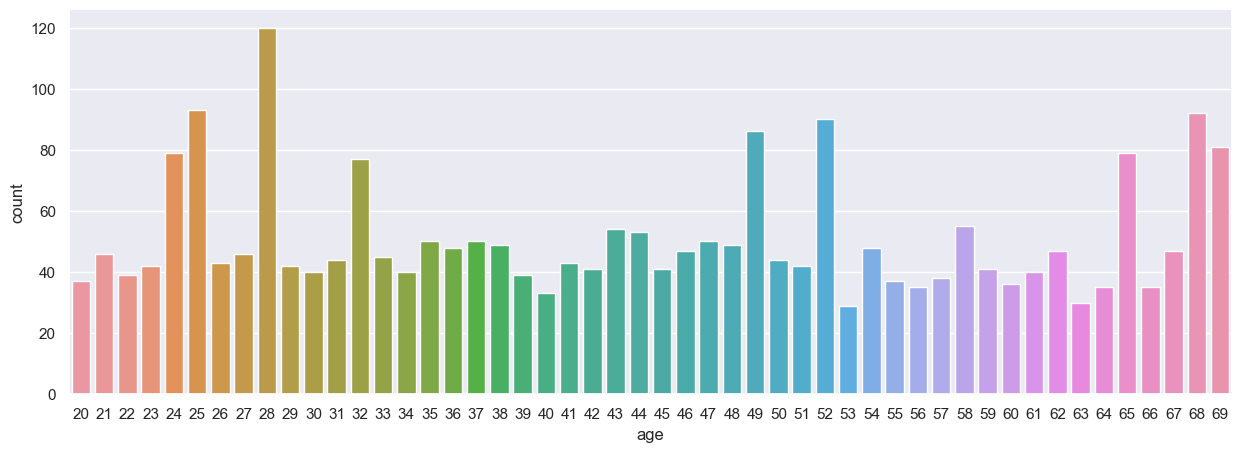

In [142]:
# так как график сильно сжат зададим более широкие размеры чтобы увидеть цифры
# и выполним построение графика заново
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data=logs_data.query('success == True'), x='age')

In [ ]:
# теперь мы видим ответ на наш вопрос, максимальное количество действий приходится на возраст 28 лет